# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

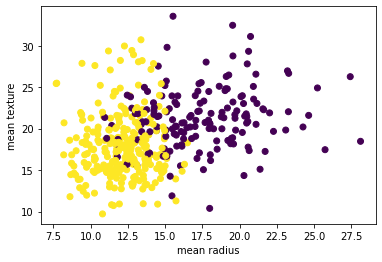

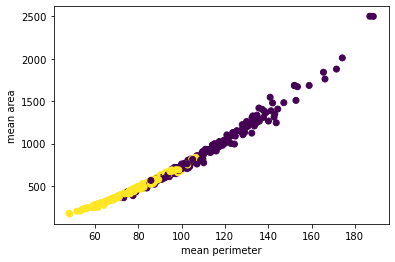

In [4]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=3)

# Plot scatter plots
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

plt.scatter(X_train[:,2], X_train[:,3], c=y_train)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.show()


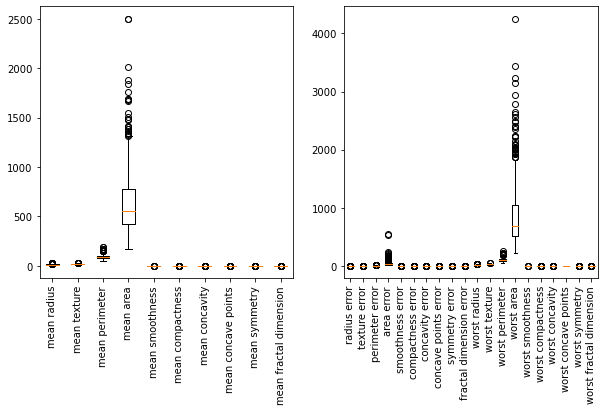

In [5]:
# Plot box plots
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].boxplot(X_train[:,0:10])
ax[0].set_xticklabels(data.feature_names[0:10], rotation=90)
ax[1].boxplot(X_train[:,10:])
ax[1].set_xticklabels(data.feature_names[10:], rotation=90)
plt.show()

In [6]:
# Train a decision tree model
tree = DecisionTreeClassifier(random_state=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.9230769230769231


In [7]:
# Train a logistic regression model
logreg = LogisticRegression(random_state=3)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression accuracy: 0.9370629370629371


C:\Users\pruth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Train a random forest model
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred))

Random Forest accuracy: 0.9440559440559441


In [9]:
# Get feature importances for decision tree and logistic regression models
tree_importances = tree.feature_importances_
logreg_importances = np.abs(logreg.coef_)[0]

# Print the feature importances
print("Decision Tree Feature Importances:")
for feature, importance in zip(data.feature_names, tree_importances):
    print(f"{feature}: {importance:.4f}")

print("\nLogistic Regression Feature Importances:")
for feature, importance in zip(data.feature_names, logreg_importances):
    print(f"{feature}: {importance:.4f}")

Decision Tree Feature Importances:
mean radius: 0.0000
mean texture: 0.0094
mean perimeter: 0.0094
mean area: 0.0087
mean smoothness: 0.0000
mean compactness: 0.0000
mean concavity: 0.0000
mean concave points: 0.0181
mean symmetry: 0.0000
mean fractal dimension: 0.0000
radius error: 0.0000
texture error: 0.0000
perimeter error: 0.0067
area error: 0.0130
smoothness error: 0.0000
compactness error: 0.0000
concavity error: 0.0067
concave points error: 0.0000
symmetry error: 0.0000
fractal dimension error: 0.0000
worst radius: 0.0000
worst texture: 0.0726
worst perimeter: 0.0161
worst area: 0.7172
worst smoothness: 0.0000
worst compactness: 0.0000
worst concavity: 0.0000
worst concave points: 0.1220
worst symmetry: 0.0000
worst fractal dimension: 0.0000

Logistic Regression Feature Importances:
mean radius: 0.8197
mean texture: 0.5861
mean perimeter: 0.3156
mean area: 0.0192
mean smoothness: 0.0357
mean compactness: 0.1494
mean concavity: 0.2092
mean concave points: 0.0852
mean symmetry: 0

In [11]:
# Use GridSearchCV to improve the best performing model
params = {"max_depth": [3, 5, 7, 10],
          "min_samples_split": [2, 5, 10, 20]}
grid_search = GridSearchCV(rf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Best Random Forest accuracy:", accuracy_score(y_test, y_pred))


Best Random Forest accuracy: 0.9440559440559441
